<a href="https://colab.research.google.com/github/IvanJ-02/Bank-Marketing/blob/main/Mod%C3%A8le_DeepLearning_Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import du jeu de données


In [ ]:
# 1

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = 'train.csv'


# Import du jeu de données
df = pd.read_csv(file_path)

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Commentaires :

Pour commencer, nous allons importer les librairies nécessaires et charger le jeu de données "Bank Marketing" en utilisant la fonction read_csv de pandas. 


## 2. Création du réseau de neuronnes profond

In [ ]:
# 2

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### Commentaires :

Le modèle contient 3 couches cachées de 10 neurones chacune, tous les neurones ont une fonction d'activation de relecture. La couche de sortie contient 1 neurone avec une fonction d'activation sigmoïde. La forme de l'entrée est définie par la forme de X_train. La méthode summary() affiche les détails du modèle.


## 3. Compilation du modèle

In [ ]:
# 3

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Commentaires :

Ici, nous utilisons l'optimiseur Adam, un algorithme d'optimisation stochastique populaire pour les réseaux de neurones profonds. Nous utilisons également la fonction de perte binary_crossentropy adaptée aux problèmes de classification binaire. Enfin, nous utilisons la métrique de précision pour évaluer les performances du modèle.



## 4. Entraînement du modèle

In [ ]:
# 4

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
322/322 [==============================] - 3s 4ms/step - loss: 0.6117 - accuracy: 0.6888 - val_loss: 0.5663 - val_accuracy: 0.7308
Epoch 2/10
322/322 [==============================] - 2s 7ms/step - loss: 0.5687 - accuracy: 0.7243 - val_loss: 0.5552 - val_accuracy: 0.7463
Epoch 3/10
322/322 [==============================] - 2s 5ms/step - loss: 0.5581 - accuracy: 0.7348 - val_loss: 0.5497 - val_accuracy: 0.7409
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5520 - accuracy: 0.7357 - val_loss: 0.5404 - val_accuracy: 0.7517
Epoch 5/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5476 - accuracy: 0.7398 - val_loss: 0.5363 - val_accuracy: 0.7529
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5439 - accuracy: 0.7424 - val_loss: 0.5330 - val_accuracy: 0.7552
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5409 - accuracy: 0.7448 - val_loss: 0.5308 - val_accuracy: 0.7564
Epoch 

### Commentaires :

Cela formera le modèle pour 10 époques avec une taille de lot de 32. Les données de validation sont fournies par validation_data=(X_test, y_test) et la sortie de formation sera affichée avec verbose=1. L'historique d'entraînement sera stocké dans la variable d'historique.


## 5. Affichage de l'historique de l'entraînement

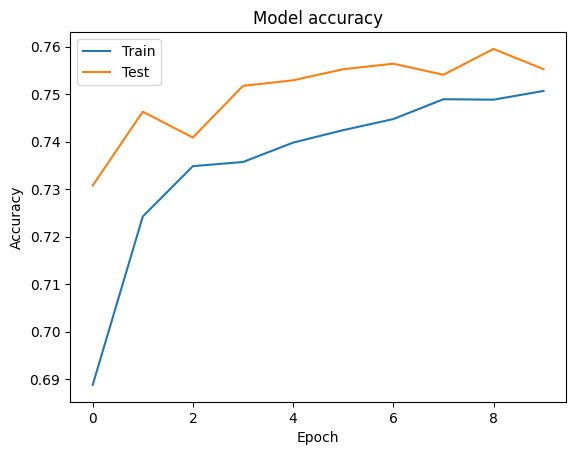

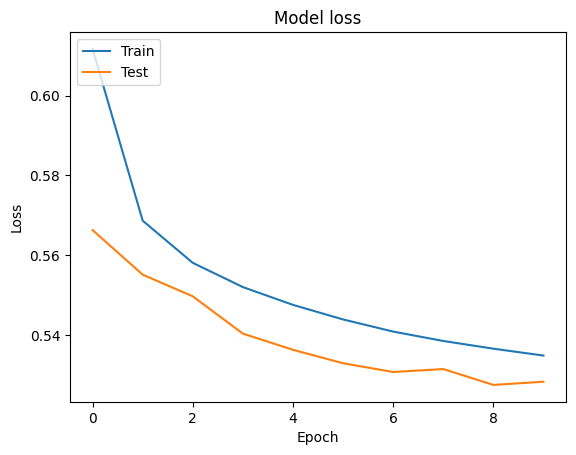

In [ ]:
# 5

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Commentaires :

Cela trace deux graphiques : un pour la précision et un pour la perte sur les données d'entraînement et de test.

## 6. Prédictions du modèle sur les données de test

In [ ]:
# 6

from sklearn.metrics import accuracy_score

# Prédictions du modèle sur les données de test
y_pred = model.predict(X_test)
# Convertir les prédictions en 0 ou 1 avec un seuil de 0.5
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)


81/81 [==============================] - 0s 1ms/step
Accuracy : 0.7552447552447552


### Commentaires :

Ici, nous utilisons la fonction precision_score de la bibliothèque sklearn.metrics pour calculer la précision du modèle. Nous obtenons d'abord les prédictions du modèle sur les données de test en utilisant la méthode de prédiction. Nous utilisons ensuite une compréhension de liste pour convertir les prédictions en 0 ou 1 avec un seuil de 0,5. Enfin, la précision est calculée en comparant la valeur prédite obtenue avec la valeur réelle de y_test.


## 7. Affichage des poids du modèle

In [ ]:
# 7

weights = model.get_weights()
for i, w in enumerate(weights):
    print("Layer {}: {}\n".format(i, w))


Layer 0: [[-0.11617386  0.6530422  -0.12392082 -0.02937577 -0.35303497  0.16307911
  -0.11446366  0.22494105 -0.4864202   0.55890536]
 [ 0.16428764 -0.01558037  0.06161024 -0.21321897  0.28840458  0.10092346
  -0.10444756  0.03003933 -0.45471555  0.1647177 ]
 [-0.04845716 -0.15600464 -0.22974592 -0.30741897  0.33974713 -0.17031223
  -0.33868515  0.13119969  0.3925203  -0.4301869 ]
 [ 0.0909358  -0.40528396  0.14592735 -0.37148476  0.08471413 -0.4658803
  -0.19848281  0.04364191 -0.32291183  0.0848301 ]
 [-0.21919629  0.2518162  -0.17573354 -0.00647824  0.21282703  0.4626907
   0.03676855  0.50870377  0.12818862 -0.12980667]
 [-0.02164831 -0.12475442  0.0416967  -0.45092458  0.09232597 -0.4797757
   0.10986128  0.4836198   0.10152986  0.28260222]
 [ 0.0109852   0.17913283 -0.4566073   0.36347407  0.0711184  -0.27424958
   0.44138613  0.707028   -0.35629615  0.03517308]
 [-0.0030306  -0.06930511 -0.09697025 -0.33488497 -0.4190448   0.49559742
   0.40727434 -0.02898627  0.4762682   0.1004

### Commentaires :

Les poids de modèle peuvent être visualisées à l'aide de l'attribut get_weights() de l'objet de modèle. Les poids sont stockées sous la forme d'une liste de tableaux NumPy pour chaque couche. Le premier élément est le tableau des poids et le deuxième élément est le tableau des biais.


## 8. Hyperparamètres du modèle et l'impact sur l'accuracy du modèle

In [ ]:
# 8

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

preds1 = model.predict(X_test)
preds1 = [1 if x>=0.5 else 0 for x in preds1]
acc1 = accuracy_score(y_test, preds1)


Epoch 1/10
322/322 [==============================] - 2s 3ms/step - loss: 0.5971 - accuracy: 0.6971 - val_loss: 0.5540 - val_accuracy: 0.7413
Epoch 2/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7272 - val_loss: 0.5476 - val_accuracy: 0.7463
Epoch 3/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7349 - val_loss: 0.5348 - val_accuracy: 0.7486
Epoch 4/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5434 - accuracy: 0.7398 - val_loss: 0.5319 - val_accuracy: 0.7506
Epoch 5/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5393 - accuracy: 0.7456 - val_loss: 0.5336 - val_accuracy: 0.7568
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5358 - accuracy: 0.7464 - val_loss: 0.5257 - val_accuracy: 0.7615
Epoch 7/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7496 - val_loss: 0.5276 - val_accuracy: 0.7615
Epoch 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

preds2 = model.predict(X_test)
preds2 = [1 if x>=0.5 else 0 for x in preds2]
acc2 = accuracy_score(y_test, preds2)


Epoch 1/20
161/161 [==============================] - 1s 3ms/step - loss: 0.5996 - accuracy: 0.6877 - val_loss: 0.5574 - val_accuracy: 0.7277
Epoch 2/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7175 - val_loss: 0.5460 - val_accuracy: 0.7374
Epoch 3/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7277 - val_loss: 0.5423 - val_accuracy: 0.7413
Epoch 4/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7298 - val_loss: 0.5396 - val_accuracy: 0.7424
Epoch 5/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7373 - val_loss: 0.5388 - val_accuracy: 0.7405
Epoch 6/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5478 - accuracy: 0.7400 - val_loss: 0.5324 - val_accuracy: 0.7545
Epoch 7/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7402 - val_loss: 0.5309 - val_accuracy: 0.7514
Epoch 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, verbose=1)

preds2 = model.predict(X_test)
preds2 = [1 if x>=0.5 else 0 for x in preds2]
acc2 = accuracy_score(y_test, preds2)


Epoch 1/20
161/161 [==============================] - 1s 3ms/step - loss: 0.6071 - accuracy: 0.6822 - val_loss: 0.5543 - val_accuracy: 0.7358
Epoch 2/20
161/161 [==============================] - 0s 3ms/step - loss: 0.5641 - accuracy: 0.7215 - val_loss: 0.5448 - val_accuracy: 0.7451
Epoch 3/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7307 - val_loss: 0.5394 - val_accuracy: 0.7502
Epoch 4/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7309 - val_loss: 0.5335 - val_accuracy: 0.7549
Epoch 5/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7364 - val_loss: 0.5343 - val_accuracy: 0.7549
Epoch 6/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7394 - val_loss: 0.5291 - val_accuracy: 0.7564
Epoch 7/20
161/161 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.7408 - val_loss: 0.5284 - val_accuracy: 0.7595
Epoch 

### Commentaires :

Le meilleur modèle est celui avec la configuration 3 avec une accuracy de 0.7525.


## 9. Sauvegarde du modèle et chargement du modèle

In [ ]:
# 9

# Sauvegarder le modèle
model.save('modele_deeplearning')

# Charger le modèle
from tensorflow.keras.models import load_model
model = load_model('modele_deeplearning')


### Commentaires :

Pour enregistrer le modèle, nous utilisons la méthode save() de l'objet model, qui spécifie le nom du fichier dans lequel le modèle sera enregistré. Nous utilisons ensuite la méthode load_model() de la bibliothèque tensorflow.keras.models pour charger le modèle enregistré, qui spécifie le chemin d'accès au fichier enregistré.

